# SMS Spam Detection :  Multinomial Naive Bayes

<b> Importing libraries and dataset </b>

In [175]:
#import libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [176]:
# import dataset and displaying first ten data
sms_data = pd.read_csv('C:/Users/user/CW/spamdata.csv', encoding='latin-1', header=None, names=['Type', 'sms', '1','2','3'])
sms_data.head(10)

,Type,sms,1,2,3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [177]:
#calculate rows of dataset
len(sms_data)

5572

In [ ]:
<b> Data pre-processing </b>

In [178]:
# boolean mask with same shape as dataset and is true wherever sms_data contains a null value
null_mask = sms_data.isnull()

# Check if any null values are present
if null_mask.any().any():
    print("Null values present in the file")
else:
    print("No null values present in the file")

Null values present in the file


In [179]:
#drop column 1, 2 and 3
sms_data = sms_data.drop(["1", "2", "3"], axis=1)

sms_data.head()

,Type,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
null_mask = sms_data.isnull()

# Check if any null values are present
if null_mask.any().any():
    print("Null values present in the file")
else:
    print("No null values present in the file")

No null values present in the file


In [181]:
# Check for duplicate rows
duplicate_mask = sms_data.duplicated()

# Check if any null values are present
if duplicate_mask.any().any():
    print("duplicate data present in the file")
else:
    print("duplicate data not present in the file")

duplicate data present in the file


In [182]:
# Count the number of duplicate rows
num_duplicates = duplicate_mask.sum()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 403


In [183]:
# Check for duplicate rows in the 'sms' column
duplicate_mask = sms_data.duplicated(subset='sms')

# Print the duplicate rows
print(sms_data[duplicate_mask])

      Type                                                sms
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


In [184]:
# Remove the duplicate rows
sms_data = sms_data.drop_duplicates()

# Print the number of rows in the resulting DataFrame
print(f'Number of rows in the DataFrame: {sms_data.shape[0]}')

Number of rows in the DataFrame: 5169


In [185]:
# counting spam and ham instances
class_counts = sms_data['Type'].value_counts()
print(class_counts)

ham     4516
spam     653
Name: Type, dtype: int64


In [186]:
# Select the spam examples
spam = sms_data[sms_data['Type'] == 'spam'].sample(653)
# Select the ham examples
ham = sms_data[sms_data['Type'] == 'ham'].sample(653)

# Concatenate the spam and ham examples into a single dataframe
subset = pd.concat([spam, ham])

In [187]:
# total number of SMS
len(subset)

1306

In [188]:
# counting spam and ham instances
class_counts = subset['Type'].value_counts()
print(class_counts)

spam    653
ham     653
Name: Type, dtype: int64


In [189]:
# calculate the rate of spam messages as a percentage of all messages
spam_rate = round((class_counts['spam']/float(class_counts['ham']+class_counts['spam']))*100, 2)

# Print the spam rate
print("Spam rate is about {0}%".format(spam_rate))

Spam rate is about 50.0%


In [190]:
ham_rate = round((class_counts['ham']/float(class_counts['ham']+class_counts['spam']))*100, 2)
# Print the spam rate
print("Ham rate is about {0}%".format(ham_rate))

Ham rate is about 50.0%


In [191]:
subset.head()

,Type,sms
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
1104,spam,Message Important information for O2 user. Tod...
4110,spam,URGENT! Your Mobile number has been awarded a ...
2429,spam,Guess who am I?This is the first time I create...
3419,spam,"As a valued customer, I am pleased to advise y..."


In [192]:
# Create a new 'label' column in the equal_subset DataFrame
subset['label'] = subset['Type'].map({'ham': 0, 'spam': 1})

In [193]:
# Drop the 'Class' column from the equal_subset DataFrame
subset = subset.drop('Type', axis=1)

# View the updated DataFrame
subset.head()

,sms,label
672,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,1
1104,Message Important information for O2 user. Tod...,1
4110,URGENT! Your Mobile number has been awarded a ...,1
2429,Guess who am I?This is the first time I create...,1
3419,"As a valued customer, I am pleased to advise y...",1


In [194]:
# Assign the values in the "sms" column of the DataFrame to the variable X
X = subset.sms

# Assign the values in the "label" column of the DataFrame to the variable Y
Y = subset.label

# Print the shape of X

print(X.shape)
print(Y.shape)

(1306,)
(1306,)


In [ ]:
<b> Split train and test dataset </b>

In [195]:
# Split the equal_subset dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(subset['sms'], subset['label'], test_size=0.2, random_state=1)

In [196]:
X_train.head()

2023    Is there any movie theatre i can go to and wat...
834                            Surely result will offer:)
4929    Hi, the SEXYCHAT girls are waiting for you to ...
4408    For your chance to WIN a FREE Bluetooth Headse...
1572    Ur cash-balance is currently 500 pounds - to m...
Name: sms, dtype: object

In [197]:
Y_train.head()

2023    0
834     0
4929    1
4408    1
1572    1
Name: label, dtype: int64

In [198]:
X_test.head()

3228    Ur cash-balance is currently 500 pounds - to m...
3249                             Babe, I need your advice
3904    Do you want a new video handset? 750 anytime a...
3968    Thanks for your message. I really appreciate y...
4072                 Was the actual exam harder than NBME
Name: sms, dtype: object

In [199]:
Y_test.head()

3228    1
3249    0
3904    1
3968    0
4072    0
Name: label, dtype: int64

In [200]:
num_total = len(Y_train)
num_spam = sum(Y_train)  # Count the number of 1s in the array
num_ham = num_total - num_spam
pct_spam = 100 * num_spam / num_total
pct_ham = 100 * num_ham / num_total
print(f'Spam: {pct_spam}%')
print(f'Ham: {pct_ham}%')

Spam: 50.47892720306513%
Ham: 49.52107279693487%


In [ ]:
<b> Tokenization and vectorization </b>

In [201]:
# Get the 'sms' column from the equal_subset DataFrame
sentences = subset['sms']

# Create an instance of the CountVectorizer class, specifying the stop_words parameter
vectorizer = CountVectorizer(stop_words='english')

In [202]:
# Fit the vectorizer to the training data
vectorizer.fit(X_train)

# Print the vocabulary
print(vectorizer.vocabulary_)

{'movie': 2217, 'theatre': 3121, 'watch': 3377, 'unlimited': 3277, 'movies': 2218, 'just': 1897, 'pay': 2410, 'surely': 3046, 'result': 2680, 'offer': 2337, 'hi': 1724, 'sexychat': 2809, 'girls': 1617, 'waiting': 3358, 'text': 3105, 'great': 1657, 'night': 2290, 'chatting': 1047, 'send': 2790, 'stop': 2982, 'service': 2798, 'chance': 1029, 'win': 3418, 'free': 1552, 'bluetooth': 888, 'headset': 1704, 'simply': 2846, 'reply': 2660, 'adp': 685, 'ur': 3291, 'cash': 1009, 'balance': 816, 'currently': 1208, '500': 462, 'pounds': 2512, 'maximize': 2119, '86688': 594, '150p': 288, 'msg': 2223, 'cc': 1018, '08718720201': 133, 'hg': 1723, 'suite342': 3029, '2lands': 360, 'row': 2712, 'w1j6hl': 3350, 'want': 3367, 'funk': 1574, 'fone': 1533, 'weekly': 3397, 'new': 2284, 'tone': 3171, 'tones2u': 3173, 'www': 3466, 'ringtones': 2699, 'uk': 3257, 'original': 2377, 'best': 857, 'tones': 3172, '3gbp': 410, 'network': 2280, 'operator': 2362, 'rates': 2599, 'apply': 752, 'saying': 2753, 'welp': 3403, '

In [203]:
# vocab size
len(vectorizer.vocabulary_.keys())

3526

In [204]:
# Fit and transform the training data
X_train_counts = vectorizer.fit_transform(X_train)
X_train_counts.shape

(1044, 3526)

In [205]:
# Transform the test data
X_test_counts = vectorizer.transform(X_test)
X_test_counts.shape

(262, 3526)

In [ ]:
<b> Model fitting for Multinomial Naive Bayes </b>

In [206]:
# Create an instance of the MultinomialNB class
mnb = MultinomialNB()

# Fit the model to the training data
mnb.fit(X_train_counts, Y_train)

# Make predictions on the test data
Y_pred = mnb.predict(X_test_counts)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9580152671755725


In [ ]:
<b> Model tuning using GridSearchCV </b>

In [207]:
# Define a range of hyperparameter values to test
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_counts, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
Y_pred = best_model.predict(X_test_counts)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'alpha': 0.1}
Accuracy: 0.9580152671755725


<b> Performance metrices </b>

In [208]:
print(classification_report(Y_test, Y_pred, target_names = ['Spam', 'Ham']))

              precision    recall  f1-score   support

        Spam       0.98      0.94      0.96       136
         Ham       0.94      0.98      0.96       126

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262



In [209]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix

print("Confusion Matrix:", cm)

Confusion Matrix: [[128   8]
 [  3 123]]


True positive (TP) , True negative (TN), False negative (FN), False positive (FP)

In [210]:
# Extract the values from the confusion matrix
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [211]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9761904761904762


In [212]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9411764705882353


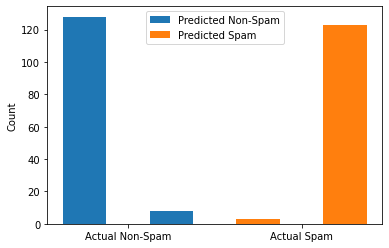

In [213]:
# Create a bar chart of the confusion matrix
plt.bar([0, 1], [TN, FP], width=0.5, label='Predicted Non-Spam')
plt.bar([2, 3], [FN, TP], width=0.5, label='Predicted Spam')
plt.xticks([0.5, 2.5], ['Actual Non-Spam', 'Actual Spam'])
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
<b> Testing output </b>

In [215]:
# Prompt the user to enter an SMS text message
text = input("Enter an SMS text message:\n\n")

print()

# Vectorize the input data
input_data_counts = vectorizer.transform([text])

# Make predictions using the model
prediction = mnb.predict(input_data_counts)

# Print a message based on the predictions
if prediction == 1:
  print("\033[1mThis message is spam.\033[0m")
else:
  print("\033[1mThis message is not spam.\033[0m")

Enter an SMS text message:

Congratulations on your promotion! I'm so happy for you. Let's celebrate with dinner tonight.

This message is not spam.
